📂 Dataset structure:
Images folder: D:\COCO2017\train2017
Annotations: D:\COCO2017\annotations\instances_train2017.json

📖 Loading COCO annotations...
✅ Total images: 118287
✅ Total annotations: 860001
📸 Selected 20000 random images for processing.

🎨 Generating 50 side-by-side visualizations...


100%|█████████████████████████████████████████████| 50/50 [00:39<00:00,  1.25it/s]


✅ 50 image–mask pairs saved to 'output_images/'

👀 Preview of first 5 results:


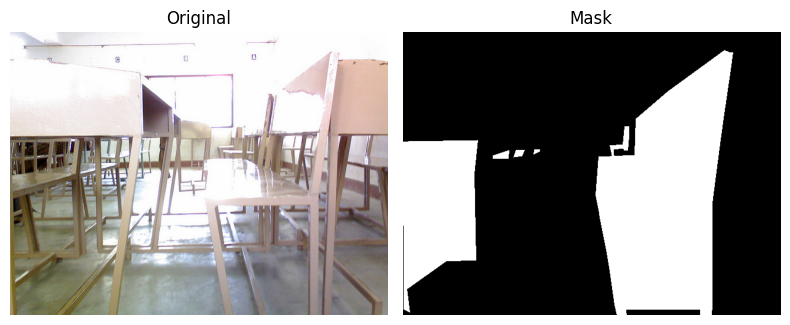

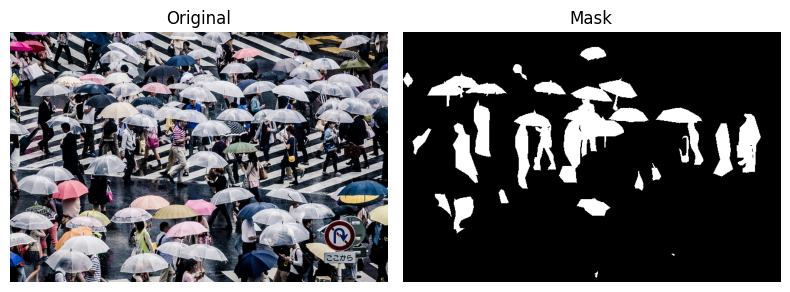

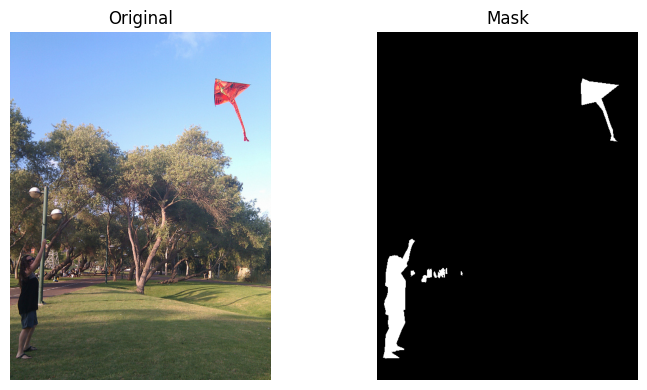

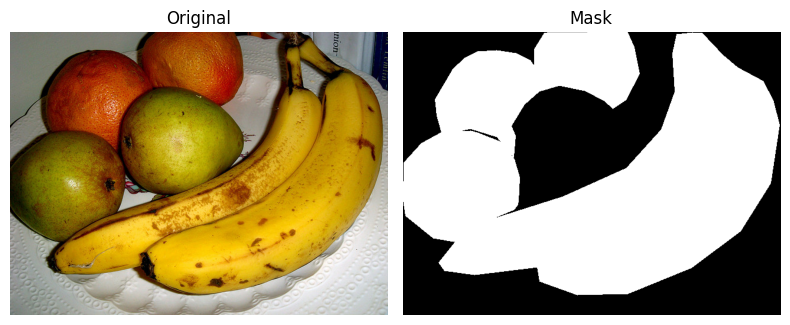

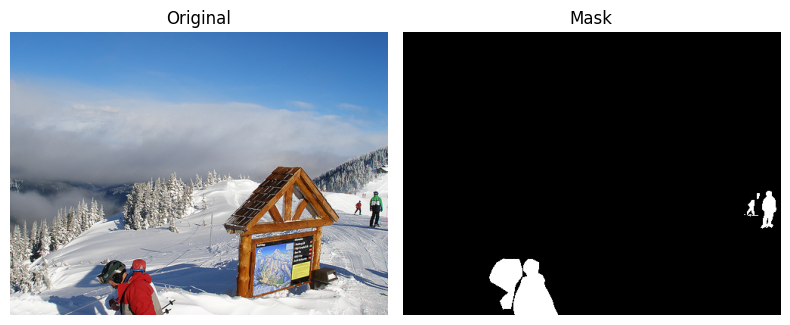


🟢 Task 1 completed successfully — ready for GitHub upload!


In [2]:
# ================================================================
# ✅ VisionExtract Project - Task 1: COCO 2017 Dataset Visualization
# ================================================================

import os
import random
import json
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import display

# ---------------------------------------------------------------
# 1️⃣ Set up dataset paths
# ---------------------------------------------------------------
base_dir = r"D:\COCO2017"
train_dir = os.path.join(base_dir, "train2017")
ann_file = os.path.join(base_dir, "annotations", "instances_train2017.json")

print("📂 Dataset structure:")
print(f"Images folder: {train_dir}")
print(f"Annotations: {ann_file}")

if not os.path.exists(train_dir) or not os.path.exists(ann_file):
    raise FileNotFoundError("❌ Dataset folders not found. Please check your D:\\COCO2017 path.")

# ---------------------------------------------------------------
# 2️⃣ Load COCO annotations
# ---------------------------------------------------------------
print("\n📖 Loading COCO annotations...")
with open(ann_file, 'r') as f:
    coco_data = json.load(f)

images_info = coco_data["images"]
annotations = coco_data["annotations"]

print(f"✅ Total images: {len(images_info)}")
print(f"✅ Total annotations: {len(annotations)}")

# ---------------------------------------------------------------
# 3️⃣ Image ID → filename mapping
# ---------------------------------------------------------------
id_to_filename = {img["id"]: img["file_name"] for img in images_info}

# ---------------------------------------------------------------
# 4️⃣ Randomly select up to 20,000 images
# ---------------------------------------------------------------
sampled_images = random.sample(images_info, min(20000, len(images_info)))
print(f"📸 Selected {len(sampled_images)} random images for processing.")

# ---------------------------------------------------------------
# 5️⃣ Function to create mask from annotation polygons
# ---------------------------------------------------------------
def create_mask(img_id, width, height):
    mask = Image.new("L", (width, height), 0)
    draw = ImageDraw.Draw(mask)

    for ann in annotations:
        if ann["image_id"] == img_id:
            segs = ann.get("segmentation", [])
            if isinstance(segs, list):
                for seg in segs:
                    if len(seg) > 4:
                        poly = [(seg[i], seg[i+1]) for i in range(0, len(seg), 2)]
                        draw.polygon(poly, outline=1, fill=1)
    return mask

# ---------------------------------------------------------------
# 6️⃣ Generate & save 50 image–mask pairs
# ---------------------------------------------------------------
os.makedirs("output_images", exist_ok=True)
print("\n🎨 Generating 50 side-by-side visualizations...")

for idx in tqdm(range(50)):
    img_info = random.choice(sampled_images)
    img_path = os.path.join(train_dir, img_info["file_name"])

    if not os.path.exists(img_path):
        continue

    img = Image.open(img_path).convert("RGB")
    mask = create_mask(img_info["id"], img_info["width"], img_info["height"])

    # Side-by-side plot
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].imshow(img)
    ax[0].set_title("Original")
    ax[0].axis("off")

    ax[1].imshow(mask, cmap="gray")
    ax[1].set_title("Mask")
    ax[1].axis("off")

    plt.tight_layout()
    plt.savefig(f"output_images/sample_{idx}.png", bbox_inches='tight')
    plt.close(fig)

print("\n✅ 50 image–mask pairs saved to 'output_images/'")

# ---------------------------------------------------------------
# 7️⃣ Preview first 5 saved pairs
# ---------------------------------------------------------------
print("\n👀 Preview of first 5 results:")
for i in range(5):
    img_path = f"output_images/sample_{i}.png"
    if os.path.exists(img_path):
        img = Image.open(img_path)
        display(img)

print("\n🟢 Task 1 completed successfully — ready for GitHub upload!")
